In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True) # this is deprecated.

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
image_count = 10
data = mnist.train.next_batch(image_count)

![](https://www.easy-tensorflow.com/images/NN/linear_classifier.png)

In [44]:
data[0].shape

(10, 784)

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


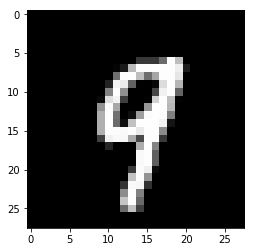

In [45]:
images = data[0]
labels = data[1]

for index, image in enumerate(images):
    print('Label:', labels[index])
    print('Digit in the image', np.argmax(labels[index]))
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()
    break

# Optimization

In [46]:
MNIST = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
# Define parameters for linear model
learning_rate = 0.01
batch_size = 128
n_epochs = 25

# Create placeholders
X = tf.placeholder(tf.float32, [batch_size, 784], name="image")
Y = tf.placeholder(tf.float32, [batch_size, 10], name="label")

# Create weights and bias
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name="weights")
b = tf.Variable(tf.zeros([1,10]), name='bias')

# calculate scores
logits = tf.matmul(X, w) + b

# Entropy cost function and loss
entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y)
loss = tf.reduce_mean(entropy)

# Define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [50]:
# Run optimization and test
loss_history = []
acc_history = []
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    n_batches = int(MNIST.train.num_examples/batch_size)
    for i in range(n_epochs):
        for _ in range(n_batches):
            X_batch, Y_batch = MNIST.train.next_batch(batch_size)
            _, loss_value = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch})
        loss_history.append(loss_value)
        
        # Check validation accuracy    
        n_v_batches = int(MNIST.validation.num_examples/batch_size)
        total_correct_preds = 0
        for j in range(n_v_batches):
            X_batch, Y_batch = MNIST.validation.next_batch(batch_size)
            _, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch})
            preds = tf.nn.softmax(logits_batch)
            correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
            accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
            total_correct_preds += sess.run(accuracy)
        validation_accuracy = total_correct_preds/MNIST.validation.num_examples
        acc_history.append(validation_accuracy)

    
    # Test the model
    n_batches = int(MNIST.test.num_examples/batch_size)
    total_correct_preds = 0
    for i in range(n_batches):
        X_batch, Y_batch = MNIST.test.next_batch(batch_size)
        logits_batch = sess.run(logits, feed_dict={X: X_batch, Y:Y_batch})
        preds = tf.nn.softmax(logits_batch)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
        accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
        total_correct_preds += sess.run(accuracy)
        
    print("Test accuracy is {0}".format(total_correct_preds/MNIST.test.num_examples))

Test accuracy is 0.9107


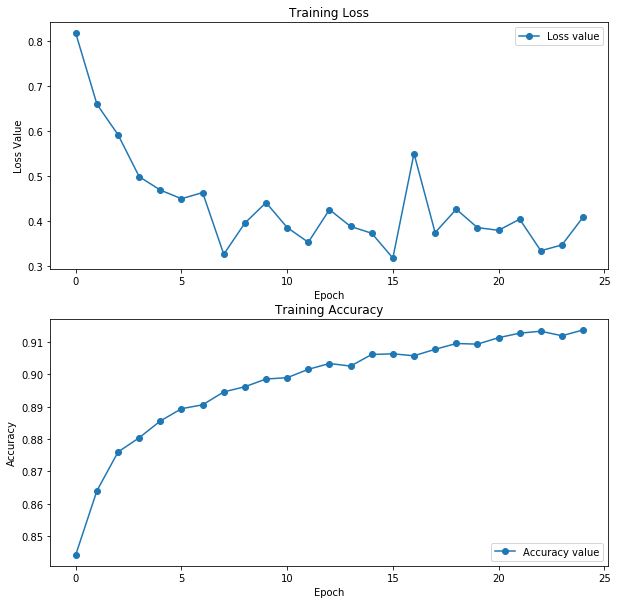

In [51]:
plt.subplot(2,1,1)
plt.plot(loss_history, '-o', label='Loss value')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend(ncol=2, loc='upper right')
plt.subplot(2,1,2)
plt.plot(acc_history, '-o', label='Accuracy value')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')
plt.gcf().set_size_inches(10, 10)
plt.show()